# Duke Nutrition Assistant CS 372 Project - Notebook 1: Data Preparation
## Step 1: Process NetNutrition Data with Comprehensive Tags

### Setup

In [313]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

Path('data').mkdir(exist_ok=True)
Path('models').mkdir(exist_ok=True)

print("Setup complete!")

Setup complete!


### Load and Explore Data

In [558]:
df = pd.read_csv('updated_duke_dining(1).csv')

print(f"Total menu items: {len(df)}")
print(f"Total restaurants: {df['restaurant'].nunique()}")
print(f"\nColumns: {list(df.columns)}")
print(f"{len(df):,}")

Total menu items: 3319
Total restaurants: 26

Columns: ['restaurant', 'meal_period', 'item_name', 'serving_size', 'dietary_labels', 'calories', 'total_fat_g', 'saturated_fat_g', 'trans_fat_g', 'cholesterol_mg', 'sodium_mg', 'total_carbs_g', 'fiber_g', 'sugars_g', 'protein_g', 'ingredients']
3,319


In [564]:
#!/usr/bin/env python3
"""
Duke Dining CSV Filter
Removes sauces, syrups, toppings, and other add-ons from the nutrition data
"""

import pandas as pd

#Input and output files
INPUT_FILE = 'updated_duke_dining(1).csv'
OUTPUT_FILE = 'duke_dining_filtered_clean.csv'

print("Duke Dining CSV Filter")
print("=" * 50)

#Read the CSV
print(f"\nReading {INPUT_FILE}...")
df = pd.read_csv(INPUT_FILE)
print(f"Loaded {len(df)} total items")

#Some manual keywords to filter out
filter_keywords = [
    'syrup',
    'sugar',
    'boost',
    'powder',
    'your way',
    'sauce', 
    'creamer',
    'whipped',
    'topping',
     'powdered sugar',
'table sugar',
'spaghetti',
'fettucine',
'almond butter boost',
'chia seed boost',
'flaxseed boost',
'granola boost',
'immunity boost',
'ghirardelli chocolate powder',
'spinach boost',
'vegan protein boost',
'vitamin boost',
'vanilla whey protein',
'chocolate whey protein boost',
'apple juice',
'orange juice',
'pineapple juice',
'almond milk',
'coconut milk',
'oat milk',
'soy milk',
'plain yogurt',
'green apple',
'avocado',
'banana',
'blueberries',
'chia seeds',
'shredded coconut',
'granola',
'mangoes',
'nutella',
'peanut butter',
'spinach',
'strawberries',
'vegan protein',
'chocolate whey protein',
'vanilla whey protein',
'brown sugar',
'raisins',
'brown rice',
'greens',
'seasoned rice',
'white rice',
'bubu arare',
'crab salad',
'eel sauce',
'kale salad',
'lemonaise dill sauce',
'marinated salmon',
'pickled carrot',
'pickled red cabbage',
'seaweed salad',
'spicy mayo',
'spicy tuna',
'marinated tuna',
'cilantro',
'seasoned broccoli',
'seasoned corn',
'stir-fried zucchini',
'teriyaki tofu',
'pickled radish',
'sambal oelek chili sauce',
'sesame seeds',
'spicy cucumber',
'spicy pork',
'stir-fried cabbage & red pepper',
'beef bulgogi',
'fried egg',
'gochujang sauce',
'green onion',
'kimchi slaw',
'sesame oil',
'white sauce',
'ginger chicken',
'grilled teriyaki chicken',
'shelled edamame',
'sweet potato',
'sriracha',
'teriyaki sauce',
'ginger chicken sauce',
'pad thai',
'spicy miso soup',
'tonkotsu soup',
'wheat noodles',
'bamboo shoots',
'bean sprouts',
'chashu (pork belly)',
'fried tofu',
'marinated egg',
'cream cheese',
    'dressing'
]

#create a mask for rows to keep (not containing any filter keywords)
def should_keep(item_name):
    if pd.isna(item_name):
        return True
    
    item_lower = str(item_name).lower()
    return not any(keyword in item_lower for keyword in filter_keywords)

#Apply filter
print(f"\nFiltering out items containing: {', '.join(filter_keywords)}")
mask = df['item_name'].apply(should_keep)

#Show what's being removed
removed_df = df[~mask]
kept_df = df[mask]

print(f"\nItems being removed ({len(removed_df)}):")
for idx, row in removed_df.iterrows():
    print(f"  - {row['item_name']}")

#Save filtered data
print(f"\n Saving filtered data to {OUTPUT_FILE}...")
kept_df.to_csv(OUTPUT_FILE, index=False)

print(f" Original items: {len(df)}")
print(f" Removed: {len(removed_df)}")
print(f" Kept: {len(kept_df)}")
print(f"\n Saved to: {OUTPUT_FILE}")

Duke Dining CSV Filter

Reading updated_duke_dining(1).csv...
Loaded 3319 total items

Filtering out items containing: syrup, sugar, boost, powder, your way, sauce, creamer, whipped, topping, powdered sugar, table sugar, spaghetti, fettucine, almond butter boost, chia seed boost, flaxseed boost, granola boost, immunity boost, ghirardelli chocolate powder, spinach boost, vegan protein boost, vitamin boost, vanilla whey protein, chocolate whey protein boost, apple juice, orange juice, pineapple juice, almond milk, coconut milk, oat milk, soy milk, plain yogurt, green apple, avocado, banana, blueberries, chia seeds, shredded coconut, granola, mangoes, nutella, peanut butter, spinach, strawberries, vegan protein, chocolate whey protein, vanilla whey protein, brown sugar, raisins, brown rice, greens, seasoned rice, white rice, bubu arare, crab salad, eel sauce, kale salad, lemonaise dill sauce, marinated salmon, pickled carrot, pickled red cabbage, seaweed salad, spicy mayo, spicy tuna, mar

In [570]:
df = kept_df
df.head()
df = df.drop_duplicates(subset=['item_name', 'restaurant'], keep='first')

In [572]:
#check data quality
print("Data Coverage Check:\n")

coverage_cols = ['calories', 'protein_g', 'total_fat_g', 'total_carbs_g', 
                 'fiber_g', 'sugars_g', 'sodium_mg']

for col in coverage_cols:
    count = df[col].notna().sum()
    pct = (count / len(df)) * 100
    print(f"  {col:20s}: {count:4d} items ({pct:5.1f}%)")

print(f"\n Most nutrition data is available.")

Data Coverage Check:

  calories            : 1642 items ( 99.9%)
  protein_g           : 1561 items ( 95.0%)
  total_fat_g         : 1614 items ( 98.2%)
  total_carbs_g       : 1581 items ( 96.2%)
  fiber_g             : 1479 items ( 90.0%)
  sugars_g            : 1510 items ( 91.8%)
  sodium_mg           : 1634 items ( 99.4%)

 Most nutrition data is available.


In [574]:
# Look at # of restaurants
print("Duke Dining Locations:\n")
restaurant_counts = df['restaurant'].value_counts()
for i, (restaurant, count) in enumerate(restaurant_counts.head(15).items(), 1):
    print(f"{i:2d}. {restaurant:35s} ({count:4d} items)")

print(f"\n... and {df['restaurant'].nunique() - 15} more locations")

Duke Dining Locations:

 1. Marketplace                         ( 203 items)
 2. Cafe                                ( 120 items)
 3. Il Forno                            ( 112 items)
 4. Trinity Cafe                        ( 110 items)
 5. Duke Marine Lab                     ( 108 items)
 6. The Devils Krafthouse               ( 105 items)
 7. Gothic Grill                        (  96 items)
 8. Saladalia @ The Perk                (  92 items)
 9. Beyu Blue Coffee                    (  89 items)
10. The Skillet                         (  71 items)
11. The Pitchfork                       (  69 items)
12. It's Thyme                          (  58 items)
13. Red Mango                           (  56 items)
14. Gyotaku                             (  49 items)
15. Twinnie's                           (  44 items)

... and 11 more locations


### Data Cleaning

In [577]:
# Clean up the data
import numpy as np
df_clean = df.copy()

def clean_numeric(value):
    """
    Convert strings like '10g' or '5mg' to float.
    Handles: '10g', '5mg', '< 1g', 'NA', empty strings, etc.
    """
    if pd.isna(value) or value == '' or value == 'NA':
        return np.nan
    
    # Convert to string and clean
    value_str = str(value).lower()
    value_str = value_str.replace('g', '').replace('mg', '')
    value_str = value_str.replace('< ', '').replace('~', '')
    value_str = value_str.strip()
    
    try:
        return float(value_str)
    except:
        return np.nan

# Apply cleaning to all nutrition columns
nutrition_cols = ['total_fat_g', 'saturated_fat_g', 'trans_fat_g', 
                  'cholesterol_mg', 'sodium_mg', 'total_carbs_g', 
                  'fiber_g', 'sugars_g', 'protein_g', 'calories']

for col in nutrition_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(clean_numeric)

print(" Data cleaned!")
print(f"\n Items with complete nutrition info: {df_clean[nutrition_cols].notna().all(axis=1).sum()}")

 Data cleaned!

 Items with complete nutrition info: 0


### Format Items for RAG System

This function will create  rich searchable text for each menu item with:
- All nutrition info (calories, protein, fat, carbs, fiber, sugar, sodium)
- Comprehensive tags (protein, fat, carb, calorie, fiber, sugar, sodium levels)
- Many use cases (muscle building, weight loss, keto, digestive health, diabetes, heart health, etc.)

In [580]:
def format_menu_item(row):
    """
    Convert a menu item row to searchable text format.
    COMPREHENSIVE VERSION with fiber, sugar, sodium, and macro ratios(for more comprehensive understanding)
    """
    # Basic info
    text = f"{row['item_name']} from {row['restaurant']}. "
    
    # Add meal period if available and useful
    if pd.notna(row['meal_period']) and row['meal_period'] not in ['All Day', 'Today, All Day']:
        text += f"Available during {row['meal_period']}. "
    
    # Add serving size if available
    if pd.notna(row['serving_size']) and row['serving_size'] != '':
        text += f"Serving size: {row['serving_size']}. "
    
    # Nutrition info-----------------------------------
    nutrition_parts = []
    
    # Calories
    if pd.notna(row['calories']) and row['calories'] > 0:
        nutrition_parts.append(f"{int(row['calories'])} calories")
    
    # Protein
    if pd.notna(row['protein_g']) and row['protein_g'] > 0:
        nutrition_parts.append(f"{row['protein_g']:.0f}g protein")
    
    # Fat
    if pd.notna(row['total_fat_g']) and row['total_fat_g'] > 0:
        nutrition_parts.append(f"{row['total_fat_g']:.0f}g fat")
    
    # Carbs
    if pd.notna(row['total_carbs_g']) and row['total_carbs_g'] > 0:
        nutrition_parts.append(f"{row['total_carbs_g']:.0f}g carbs")
    
    # Fiber
    if pd.notna(row['fiber_g']) and row['fiber_g'] > 0:
        nutrition_parts.append(f"{row['fiber_g']:.0f}g fiber")
    
    # Sugars
    if pd.notna(row['sugars_g']) and row['sugars_g'] > 0:
        nutrition_parts.append(f"{row['sugars_g']:.0f}g sugars")
    
    # Sodium
    if pd.notna(row['sodium_mg']) and row['sodium_mg'] > 0:
        nutrition_parts.append(f"{int(row['sodium_mg'])}mg sodium")
    
    if nutrition_parts:
        text += "Nutrition: " + ", ".join(nutrition_parts) + ". "
    
    # Dietary labels (Vegan, Vegetarian, Gluten Free, Halal)
    if pd.notna(row['dietary_labels']) and row['dietary_labels'] != '':
        text += f"Dietary: {row['dietary_labels']}. "
    
    # Macro info -----------------------------------
    macro_ratios = []
    
    if pd.notna(row['calories']) and row['calories'] > 0:
        # Calculate percentage of calories from each macro
        if pd.notna(row['protein_g']) and row['protein_g'] > 0:
            protein_cal = row['protein_g'] * 4
            protein_pct = (protein_cal / row['calories']) * 100
            macro_ratios.append(f"{protein_pct:.0f}% protein")
        
        if pd.notna(row['total_fat_g']) and row['total_fat_g'] > 0:
            fat_cal = row['total_fat_g'] * 9
            fat_pct = (fat_cal / row['calories']) * 100
            macro_ratios.append(f"{fat_pct:.0f}% fat")
        
        if pd.notna(row['total_carbs_g']) and row['total_carbs_g'] > 0:
            carb_cal = row['total_carbs_g'] * 4
            carb_pct = (carb_cal / row['calories']) * 100
            macro_ratios.append(f"{carb_pct:.0f}% carbs")
    
    if macro_ratios:
        text += f"Macros: {', '.join(macro_ratios)}. "
    
    # Comprehensive tags ----------------
    tags = []
    
    # PROTEIN TAGS 
    if pd.notna(row['protein_g']):
        if row['protein_g'] >= 30:
            tags.append("very high protein")
        elif row['protein_g'] >= 20:
            tags.append("high protein")
        elif row['protein_g'] >= 15:
            tags.append("moderate protein")
        elif row['protein_g'] < 5:
            tags.append("low protein")
    
    # FAT TAGS 
    if pd.notna(row['total_fat_g']):
        if row['total_fat_g'] < 5:
            tags.append("low fat")
        elif row['total_fat_g'] >= 20:
            tags.append("high fat")
    
    # CARB TAGS 
    if pd.notna(row['total_carbs_g']):
        if row['total_carbs_g'] < 10:
            tags.append("very low carb")
            tags.append("keto friendly")
        elif row['total_carbs_g'] < 20:
            tags.append("low carb")
        elif row['total_carbs_g'] >= 50:
            tags.append("high carb")
        elif row['total_carbs_g'] >= 30:
            tags.append("moderate carb")
    
    # CALORIE TAGS 
    if pd.notna(row['calories']):
        if row['calories'] < 150:
            tags.append("very low calorie")
        elif row['calories'] < 300:
            tags.append("low calorie")
        elif row['calories'] >= 500:
            tags.append("high calorie")
    
    # FIBER TAGS
    if pd.notna(row['fiber_g']):
        if row['fiber_g'] >= 5:
            tags.append("high fiber")
        elif row['fiber_g'] >= 3:
            tags.append("good fiber source")
    
    # SUGAR TAGS 
    if pd.notna(row['sugars_g']):
        if row['sugars_g'] < 5:
            tags.append("low sugar")
        elif row['sugars_g'] >= 20:
            tags.append("high sugar")
    
    # SODIUM TAGS
    if pd.notna(row['sodium_mg']):
        if row['sodium_mg'] < 200:
            tags.append("low sodium")
        elif row['sodium_mg'] >= 800:
            tags.append("high sodium")
    
    # Ratio tags -------------
    if pd.notna(row['calories']) and row['calories'] > 0:
        
        # PROTEIN RATIO TAGS
        if pd.notna(row['protein_g']):
            protein_cal = row['protein_g'] * 4
            protein_pct = (protein_cal / row['calories']) * 100
            
            if protein_pct >= 50:
                tags.append("ultra-lean protein source")
            elif protein_pct >= 40:
                tags.append("very lean protein source")
            elif protein_pct >= 30:
                tags.append("lean protein source")
        
        # FAT RATIO TAGS
        if pd.notna(row['total_fat_g']):
            fat_cal = row['total_fat_g'] * 9
            fat_pct = (fat_cal / row['calories']) * 100
            
            if fat_pct >= 60:
                tags.append("high fat ratio")
            elif fat_pct < 20:
                tags.append("low fat ratio")
        
        # CARB RATIO TAGS
        if pd.notna(row['total_carbs_g']):
            carb_cal = row['total_carbs_g'] * 4
            carb_pct = (carb_cal / row['calories']) * 100
            
            if carb_pct >= 60:
                tags.append("carb-focused")
            elif carb_pct < 10:
                tags.append("very low carb ratio")
        
        # PROTEIN-TO-FAT RATIO (for bodybuilders?)
        if pd.notna(row['protein_g']) and pd.notna(row['total_fat_g']) and row['total_fat_g'] > 0:
            p_to_f_ratio = row['protein_g'] / row['total_fat_g']
            
            if p_to_f_ratio >= 5:
                tags.append("extremely lean macros")
            elif p_to_f_ratio >= 3:
                tags.append("lean macros")
    
    if tags:
        text += f"Tags: {', '.join(tags)}. "
    
    # Main use Cases -----------
    use_cases = []
    
    # MUSCLE BUILDING / BULKING
    if 'high protein' in tags or 'very high protein' in tags:
        if 'low fat' in tags:
            use_cases.append("excellent for lean muscle building")
        else:
            use_cases.append("great for bulking and muscle gain")
    
    # WEIGHT LOSS / CUTTING
    if 'low calorie' in tags or 'very low calorie' in tags:
        if 'high protein' in tags or 'moderate protein' in tags:
            use_cases.append("ideal for cutting while preserving muscle")
        else:
            use_cases.append("good for weight loss")
    
    # AGGRESSIVE CUTTING
    if 'ultra-lean protein source' in tags or 'very lean protein source' in tags:
        use_cases.append("perfect for aggressive cutting")
    
    # CLEAN BULKING
    if 'lean protein source' in tags and 'high protein' in tags:
        use_cases.append("ideal for clean bulking")
    
    # ENDURANCE / RUNNING / PRE-WORKOUT
    if 'high carb' in tags or 'moderate carb' in tags:
        if 'low fat' in tags:
            use_cases.append("perfect for pre-run or pre-workout energy")
        else:
            use_cases.append("good for sustained energy and endurance")
    
    # ENDURANCE TRAINING
    if 'carb-focused' in tags:
        use_cases.append("excellent for endurance training and glycogen loading")
    
    # POST-WORKOUT RECOVERY
    if pd.notna(row['protein_g']) and pd.notna(row['total_carbs_g']):
        if row['protein_g'] >= 15 and row['total_carbs_g'] >= 30:
            use_cases.append("excellent for post-workout recovery")
    
    # KETO / LOW CARB DIET
    if 'keto friendly' in tags or 'very low carb' in tags:
        if 'high fat' in tags:
            use_cases.append("perfect for ketogenic diet")
        else:
            use_cases.append("suitable for low-carb diets")
    
    # KETO MACROS
    if 'high fat ratio' in tags and 'very low carb ratio' in tags:
        use_cases.append("ideal keto macros")
    
    # DIGESTIVE HEALTH
    if 'high fiber' in tags or 'good fiber source' in tags:
        use_cases.append("supports digestive health and regularity")
    
    # DIABETES / BLOOD SUGAR
    if 'low sugar' in tags:
        if 'high fiber' in tags or 'good fiber source' in tags:
            use_cases.append("good for blood sugar control")
        else:
            use_cases.append("low sugar option")
    
    # HEART HEALTH
    if 'low sodium' in tags:
        if 'low fat' in tags:
            use_cases.append("heart-healthy option")
        else:
            use_cases.append("low sodium choice")
    
    # VEGAN / VEGETARIAN
    if pd.notna(row['dietary_labels']):
        if 'Vegan' in str(row['dietary_labels']):
            use_cases.append("plant-based vegan option")
        elif 'Vegetarian' in str(row['dietary_labels']):
            use_cases.append("vegetarian-friendly")
    
    # CLEAN EATING
    if 'low sodium' in tags and 'low sugar' in tags:
        use_cases.append("clean eating option")
    
    # MACRO TRACKING 
    if 'lean macros' in tags or 'extremely lean macros' in tags:
        use_cases.append("great for macro tracking and IIFYM")
    
    # QUICK SNACK
    if pd.notna(row['calories']) and row['calories'] < 200:
        use_cases.append("light snack option")
    
    if use_cases:
        text += f"Good for: {', '.join(use_cases)}."
    
    return text.strip()

print("Format function ready")

Format function ready


In [582]:
# Test on a few different items
print("Testing format function on sample items:\n")

# Test 1 - High fiber item
if len(df_clean[df_clean['fiber_g'] > 5]) > 0:
    sample_idx = df_clean[df_clean['fiber_g'] > 5].index[0]
    sample_formatted = format_menu_item(df_clean.iloc[sample_idx])
    print("High Fiber Item:")
    print(f"   {sample_formatted[:250]}...\n")

# Test 2 - Low calorie item
if len(df_clean[df_clean['calories'] < 150]) > 0:
    sample_idx = df_clean[df_clean['calories'] < 150].index[0]
    sample_formatted = format_menu_item(df_clean.iloc[sample_idx])
    print("Low Calorie Item:")
    print(f"   {sample_formatted[:250]}...\n")

Testing format function on sample items:

High Fiber Item:
   Iced Chai Latte Skim Milk from Beyu Blue Coffee. Available during Specialty Drinks. Nutrition: 190 calories, 7g protein, 40g carbs, 2g fiber, 37g sugars, 95mg sodium. Dietary: Vegetarian. Macros: 15% protein, 84% carbs. Tags: low fat, moderate carb, ...

Low Calorie Item:
   Americano Decaffeinated from Bella Union. Nutrition: 5mg sodium. Dietary: Vegan; Vegetarian. Tags: low protein, low fat, very low carb, keto friendly, very low calorie, low sugar, low sodium. Good for: good for weight loss, suitable for low-carb diet...



In [584]:
#Format all items
print(" Formatting all menu items...")

from tqdm import tqdm
tqdm.pandas(desc="Formatting items")

df_clean['formatted_text'] = df_clean.progress_apply(format_menu_item, axis=1)

print(f"\n Formatted {len(df_clean)} items!")

 Formatting all menu items...


Formatting items: 100%|██████████████████| 1644/1644 [00:00<00:00, 11576.65it/s]


 Formatted 1644 items!


### Save Processed Data

In [587]:
#Create output format
output_data = {
    'documents': df_clean['formatted_text'].tolist(),
    'items': df_clean.to_dict('records')
}

#Save as JSON
output_path = 'data/menu_processed.json'
with open(output_path, 'w') as f:
    json.dump(output_data, f, indent=2)

file_size = Path(output_path).stat().st_size / 1024 / 1024

print(f" Saved {len(output_data['documents'])} processed menu items")
print(f"\n File saved to: {output_path}")
print(f" File size: {file_size:.2f} MB")

 Saved 1644 processed menu items

 File saved to: data/menu_processed.json
 File size: 3.03 MB


### Analyze the Dataset: 
Note: some may be error of input by Duke NetNutrition

In [590]:
#Statistics and analysis of the data
print(" Dataset Statistics:\n")
print("="*60)

print(f"\n Basic Info:")
print(f"  Total items: {len(df_clean):,}")
print(f"  Total restaurants: {df_clean['restaurant'].nunique()}")

print("\n Nutrition Coverage:")
coverage = {
    'Calories': df_clean['calories'].notna().sum(),
    'Protein': df_clean['protein_g'].notna().sum(),
    'Fat': df_clean['total_fat_g'].notna().sum(),
    'Carbs': df_clean['total_carbs_g'].notna().sum(),
    'Fiber': df_clean['fiber_g'].notna().sum(),
    'Sugars': df_clean['sugars_g'].notna().sum(),
    'Sodium': df_clean['sodium_mg'].notna().sum(),
}

for nutrient, count in coverage.items():
    pct = (count / len(df_clean)) * 100
    print(f"  {nutrient:12s}: {count:4,} items ({pct:5.1f}%)")

print("\n Protein Distribution (for items with data):")
protein_data = df_clean['protein_g'].dropna()
print(f"  Mean: {protein_data.mean():.1f}g")
print(f"  Median: {protein_data.median():.1f}g")
print(f"  Min: {protein_data.min():.1f}g")
print(f"  Max: {protein_data.max():.1f}g")

print("\n Fiber Distribution (for items with data):")
fiber_data = df_clean['fiber_g'].dropna()
print(f"  Mean: {fiber_data.mean():.1f}g")
print(f"  Median: {fiber_data.median():.1f}g")
print(f"  High fiber items (≥5g): {(fiber_data >= 5).sum()}")

print("\n Top High-Protein Items:")
high_protein = df_clean[df_clean['protein_g'] > 30].sort_values('protein_g', ascending=False)
for i, row in high_protein.head(5).iterrows():
    print(f"  • {row['item_name']:40s} at {row['restaurant']:25s}: {row['protein_g']:.0f}g")

print("\n Top High-Fiber Items:")
high_fiber = df_clean[df_clean['fiber_g'] > 5].sort_values('fiber_g', ascending=False)
for i, row in high_fiber.head(5).iterrows():
    print(f"  • {row['item_name']:40s} at {row['restaurant']:25s}: {row['fiber_g']:.0f}g")

 Dataset Statistics:


 Basic Info:
  Total items: 1,644
  Total restaurants: 26

 Nutrition Coverage:
  Calories    : 1,642 items ( 99.9%)
  Protein     : 1,561 items ( 95.0%)
  Fat         : 1,614 items ( 98.2%)
  Carbs       : 1,581 items ( 96.2%)
  Fiber       : 1,479 items ( 90.0%)
  Sugars      : 1,510 items ( 91.8%)
  Sodium      : 1,634 items ( 99.4%)

 Protein Distribution (for items with data):
  Mean: 16.4g
  Median: 8.0g
  Min: 0.0g
  Max: 1364.0g

 Fiber Distribution (for items with data):
  Mean: 2.8g
  Median: 1.0g
  High fiber items (≥5g): 200

 Top High-Protein Items:
  • Sunflower Seed Spread                    at Trinity Cafe             : 1364g
  • Sweet Thai Chili Chicken Sandwich        at Gothic Grill             : 682g
  • Strawberry Shortcake Cake                at Cafe                     : 628g
  • Tiramisu Cake                            at Cafe                     : 472g
  • Frosted Strawberry Lemonade Cupcake      at Cafe                     : 315g

 Top H

In [592]:
with open('data/menu_processed.json', 'r') as f:
    data = json.load(f)

# Check a few documents
for i in range(3):
    print(f"\n{'='*80}")
    print(f"Document {i}:")
    print(data['documents'][i])


Document 0:
Americano Decaffeinated from Bella Union. Nutrition: 5mg sodium. Dietary: Vegan; Vegetarian. Tags: low protein, low fat, very low carb, keto friendly, very low calorie, low sugar, low sodium. Good for: good for weight loss, suitable for low-carb diets, low sugar option, heart-healthy option, plant-based vegan option, clean eating option, light snack option.

Document 1:
Americano Regular from Bella Union. Nutrition: 5 calories, 5mg sodium. Dietary: Vegan; Vegetarian. Tags: low protein, low fat, very low carb, keto friendly, very low calorie, low sugar, low sodium, low fat ratio, very low carb ratio. Good for: good for weight loss, suitable for low-carb diets, low sugar option, heart-healthy option, plant-based vegan option, clean eating option, light snack option.

Document 2:
Cafe Au Lait Skim Milk from Bella Union. Nutrition: 160 calories, 17g protein, 25g carbs, 23g sugars, 240mg sodium. Dietary: Vegetarian. Macros: 42% protein, 62% carbs. Tags: moderate protein, low fa

### Visualize the Data

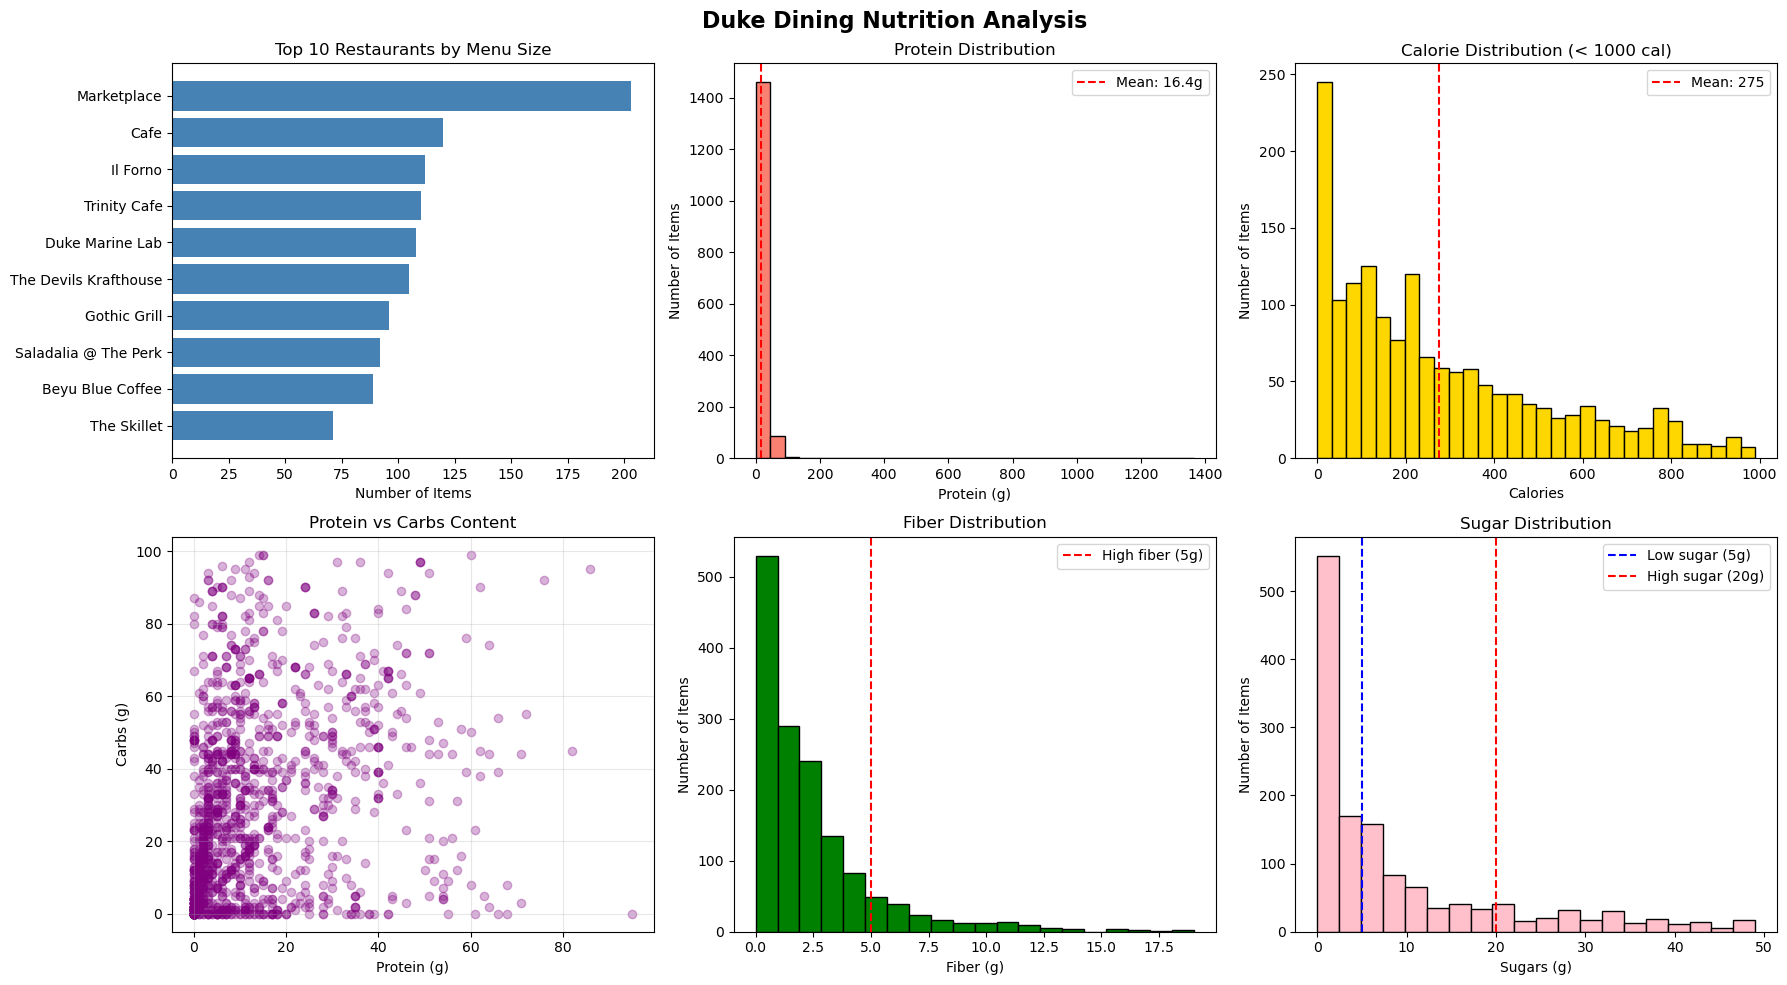


 Visualization saved to: data/nutrition_analysis.png


In [595]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Duke Dining Nutrition Analysis', fontsize=16, fontweight='bold')

# items per restaurant
restaurant_counts = df_clean['restaurant'].value_counts().head(10)
axes[0, 0].barh(restaurant_counts.index, restaurant_counts.values, color='steelblue')
axes[0, 0].set_xlabel('Number of Items')
axes[0, 0].set_title('Top 10 Restaurants by Menu Size')
axes[0, 0].invert_yaxis()

# protein distribution
protein_clean = df_clean['protein_g'].dropna()
axes[0, 1].hist(protein_clean, bins=30, edgecolor='black', color='salmon')
axes[0, 1].set_xlabel('Protein (g)')
axes[0, 1].set_ylabel('Number of Items')
axes[0, 1].set_title('Protein Distribution')
axes[0, 1].axvline(protein_clean.mean(), color='red', linestyle='--', 
                    label=f'Mean: {protein_clean.mean():.1f}g')
axes[0, 1].legend()

# calories distribution
calories_clean = df_clean['calories'].dropna()
# Remove outliers for better visualization
calories_filtered = calories_clean[calories_clean < 1000]
axes[0, 2].hist(calories_filtered, bins=30, edgecolor='black', color='gold')
axes[0, 2].set_xlabel('Calories')
axes[0, 2].set_ylabel('Number of Items')
axes[0, 2].set_title('Calorie Distribution (< 1000 cal)')
axes[0, 2].axvline(calories_filtered.mean(), color='red', linestyle='--', 
                    label=f'Mean: {calories_filtered.mean():.0f}')
axes[0, 2].legend()

# Macros scatter (protein vs carbs)
df_macros = df_clean[(df_clean['protein_g'].notna()) & 
                     (df_clean['total_carbs_g'].notna()) &
                     (df_clean['protein_g'] < 100) &
                     (df_clean['total_carbs_g'] < 100)]
axes[1, 0].scatter(df_macros['protein_g'], df_macros['total_carbs_g'], 
                   alpha=0.3, color='purple')
axes[1, 0].set_xlabel('Protein (g)')
axes[1, 0].set_ylabel('Carbs (g)')
axes[1, 0].set_title('Protein vs Carbs Content')
axes[1, 0].grid(True, alpha=0.3)

# Fiber distribution
fiber_clean = df_clean['fiber_g'].dropna()
fiber_filtered = fiber_clean[fiber_clean < 20]  # Remove outliers
axes[1, 1].hist(fiber_filtered, bins=20, edgecolor='black', color='green')
axes[1, 1].set_xlabel('Fiber (g)')
axes[1, 1].set_ylabel('Number of Items')
axes[1, 1].set_title('Fiber Distribution')
axes[1, 1].axvline(5, color='red', linestyle='--', label='High fiber (5g)')
axes[1, 1].legend()

# Sugar distribution
sugar_clean = df_clean['sugars_g'].dropna()
sugar_filtered = sugar_clean[sugar_clean < 50]  # Remove outliers
axes[1, 2].hist(sugar_filtered, bins=20, edgecolor='black', color='pink')
axes[1, 2].set_xlabel('Sugars (g)')
axes[1, 2].set_ylabel('Number of Items')
axes[1, 2].set_title('Sugar Distribution')
axes[1, 2].axvline(5, color='blue', linestyle='--', label='Low sugar (5g)')
axes[1, 2].axvline(20, color='red', linestyle='--', label='High sugar (20g)')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('data/nutrition_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Visualization saved to: data/nutrition_analysis.png")

## First Notebook Contains:

- Cleaned nutrition data with 99.9% calorie coverage + analysis
- Formatted text documents with **comprehensive tags**
- Fiber, sugar, and sodium information included
- Saved processed data to `data/menu_processed.json`

### Purpose: handle queries like:
- "I want to bulk up" → high protein items
- "Pre-run energy" → high carb items
- "I need more fiber" → high fiber items
- "Low sugar for diabetes" → low sugar items
- "Heart healthy meal" → low sodium + low fat
- "I'm doing keto" → keto friendly items
- "Vegan protein" → vegan + high protein
- "Clean eating" → low sodium + low sugar

### Notebook 2 will contain:
1. Create embeddings for retrieval
2. Test that retrieval finds relevant items

### File Output:
- `data/menu_processed.json` - For embeddings
- `data/nutrition_analysis.png` - Visualizations

In [598]:
# Quick sanity check
print("Final Sanity Check:\n")
print(f"Processed {len(df_clean):,} items")
print(f"Created {len(output_data['documents']):,} formatted documents")
print(f"Saved to data/menu_processed.json")
print(f"\nSample formatted document:")
print(f"   {output_data['documents'][100][:300]}...")

Final Sanity Check:

Processed 1,644 items
Created 1,644 formatted documents
Saved to data/menu_processed.json

Sample formatted document:
   Lemon Cranberry Muffin from Bseisu Coffee Bar. Available during Breakfast. Nutrition: 380 calories, 5g protein, 17g fat, 53g carbs, 1g fiber, 30g sugars, 340mg sodium. Dietary: Gluten Free; Vegetarian. Macros: 5% protein, 40% fat, 56% carbs. Tags: high carb, high sugar. Good for: good for sustained ...
